In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = 'car_sales_data.csv'
# Use Pandas to read in the dataset from the csv file.
df = pd.read_csv(data)
# Lets look at the first five rows of the resulting
# Pandas data frame to check what we have read in.
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [3]:
# Extract the input features, which we will call x.
feature_names = ["Engine size", "Year of manufacture", "Mileage"]
x = df[feature_names]
# Extract the output features, which we will call y.
y = df["Price"]

In [4]:
# Split between train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [5]:

# Create an instance of the MinMaxScaler class
scale = MinMaxScaler()
# Fit the min-max scaler to the input data in x_train.
# This will find the minimum and maximum value
# of each column in x_train. Note that we are
# using the training dataset here.
scale.fit(x_train)

MinMaxScaler()

In [6]:
#apply the min-max scaler transformation. 
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [7]:

#creating an instance of the Sequential class.

model = Sequential()


In [8]:
#  add the first hidden layer of # the network, which will be a Dense (i.e.# fully connected) layer with 64 neurons (i.e. units) and input_dim = 3.

model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Next, we want to apply a 20% dropout rate to  this hidden layer, to help prevent overfitting

model.add(Dropout(0.2))
#add a second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
#  create the output layer.

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# compile the model using the Adam optimizer with its default parameter

model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

In [10]:
# Define the early stopping criterion, monitor the validation Loss, and a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model.
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Epoch 1/200
1125/1125 [==============================] - 2s 1ms/step - loss: 350702016.0000 - mean_squared_error: 350702016.0000 - val_loss: 199921920.0000 - val_mean_squared_error: 199921920.0000
Epoch 2/200
1125/1125 [==============================] - 1s 1ms/step - loss: 175534208.0000 - mean_squared_error: 175534208.0000 - val_loss: 127976872.0000 - val_mean_squared_error: 127976872.0000
Epoch 3/200
1125/1125 [==============================] - 1s 1ms/step - loss: 110777904.0000 - mean_squared_error: 110777904.0000 - val_loss: 78681248.0000 - val_mean_squared_error: 78681248.0000
Epoch 4/200
1125/1125 [==============================] - 1s 1ms/step - loss: 76898104.0000 - mean_squared_error: 76898104.0000 - val_loss: 58581936.0000 - val_mean_squared_error: 58581936.0000
Epoch 5/200
1125/1125 [==============================] - 1s 1ms/step - loss: 61757064.0000 - mean_squared_error: 61757064.0000 - val_loss: 49274328.0000 - val_mean_squared_error: 49274328.0000
Epoch 6/200
1125/1125 [==

313/313 [==============================] - 0s 822us/step


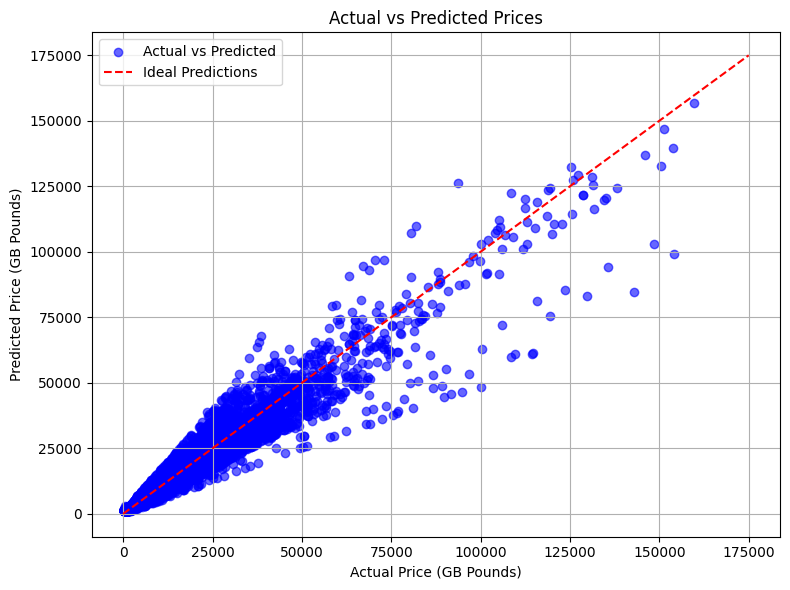

In [11]:
y_pred = model.predict(x_test_scaled)

# Plot the predicted vs actual price.
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')  # Adjust marker color and transparency

# Add a straight diagonal line with a dashed red line style.
plt.plot([0, 175000], [0, 175000], 'r--', label='Ideal Predictions')

# Label both axes.
plt.xlabel("Actual Price (GB Pounds)")
plt.ylabel("Predicted Price (GB Pounds)")

# Add a title
plt.title("Actual vs Predicted Prices")

# Add gridlines
plt.grid(True)

# Add a legend
plt.legend()

# Save the plot as an image file with a resolution of 300 dpi.
plt.savefig('ANNModel2.png', dpi=300)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [12]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



313/313 [==============================] - 0s 874us/step


In [13]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 19482265.1470
Mean Absolute Error (MAE): 2249.8448
Root Mean Squared Error (RMSE): 4413.8719
R-squared (R2): 0.9282


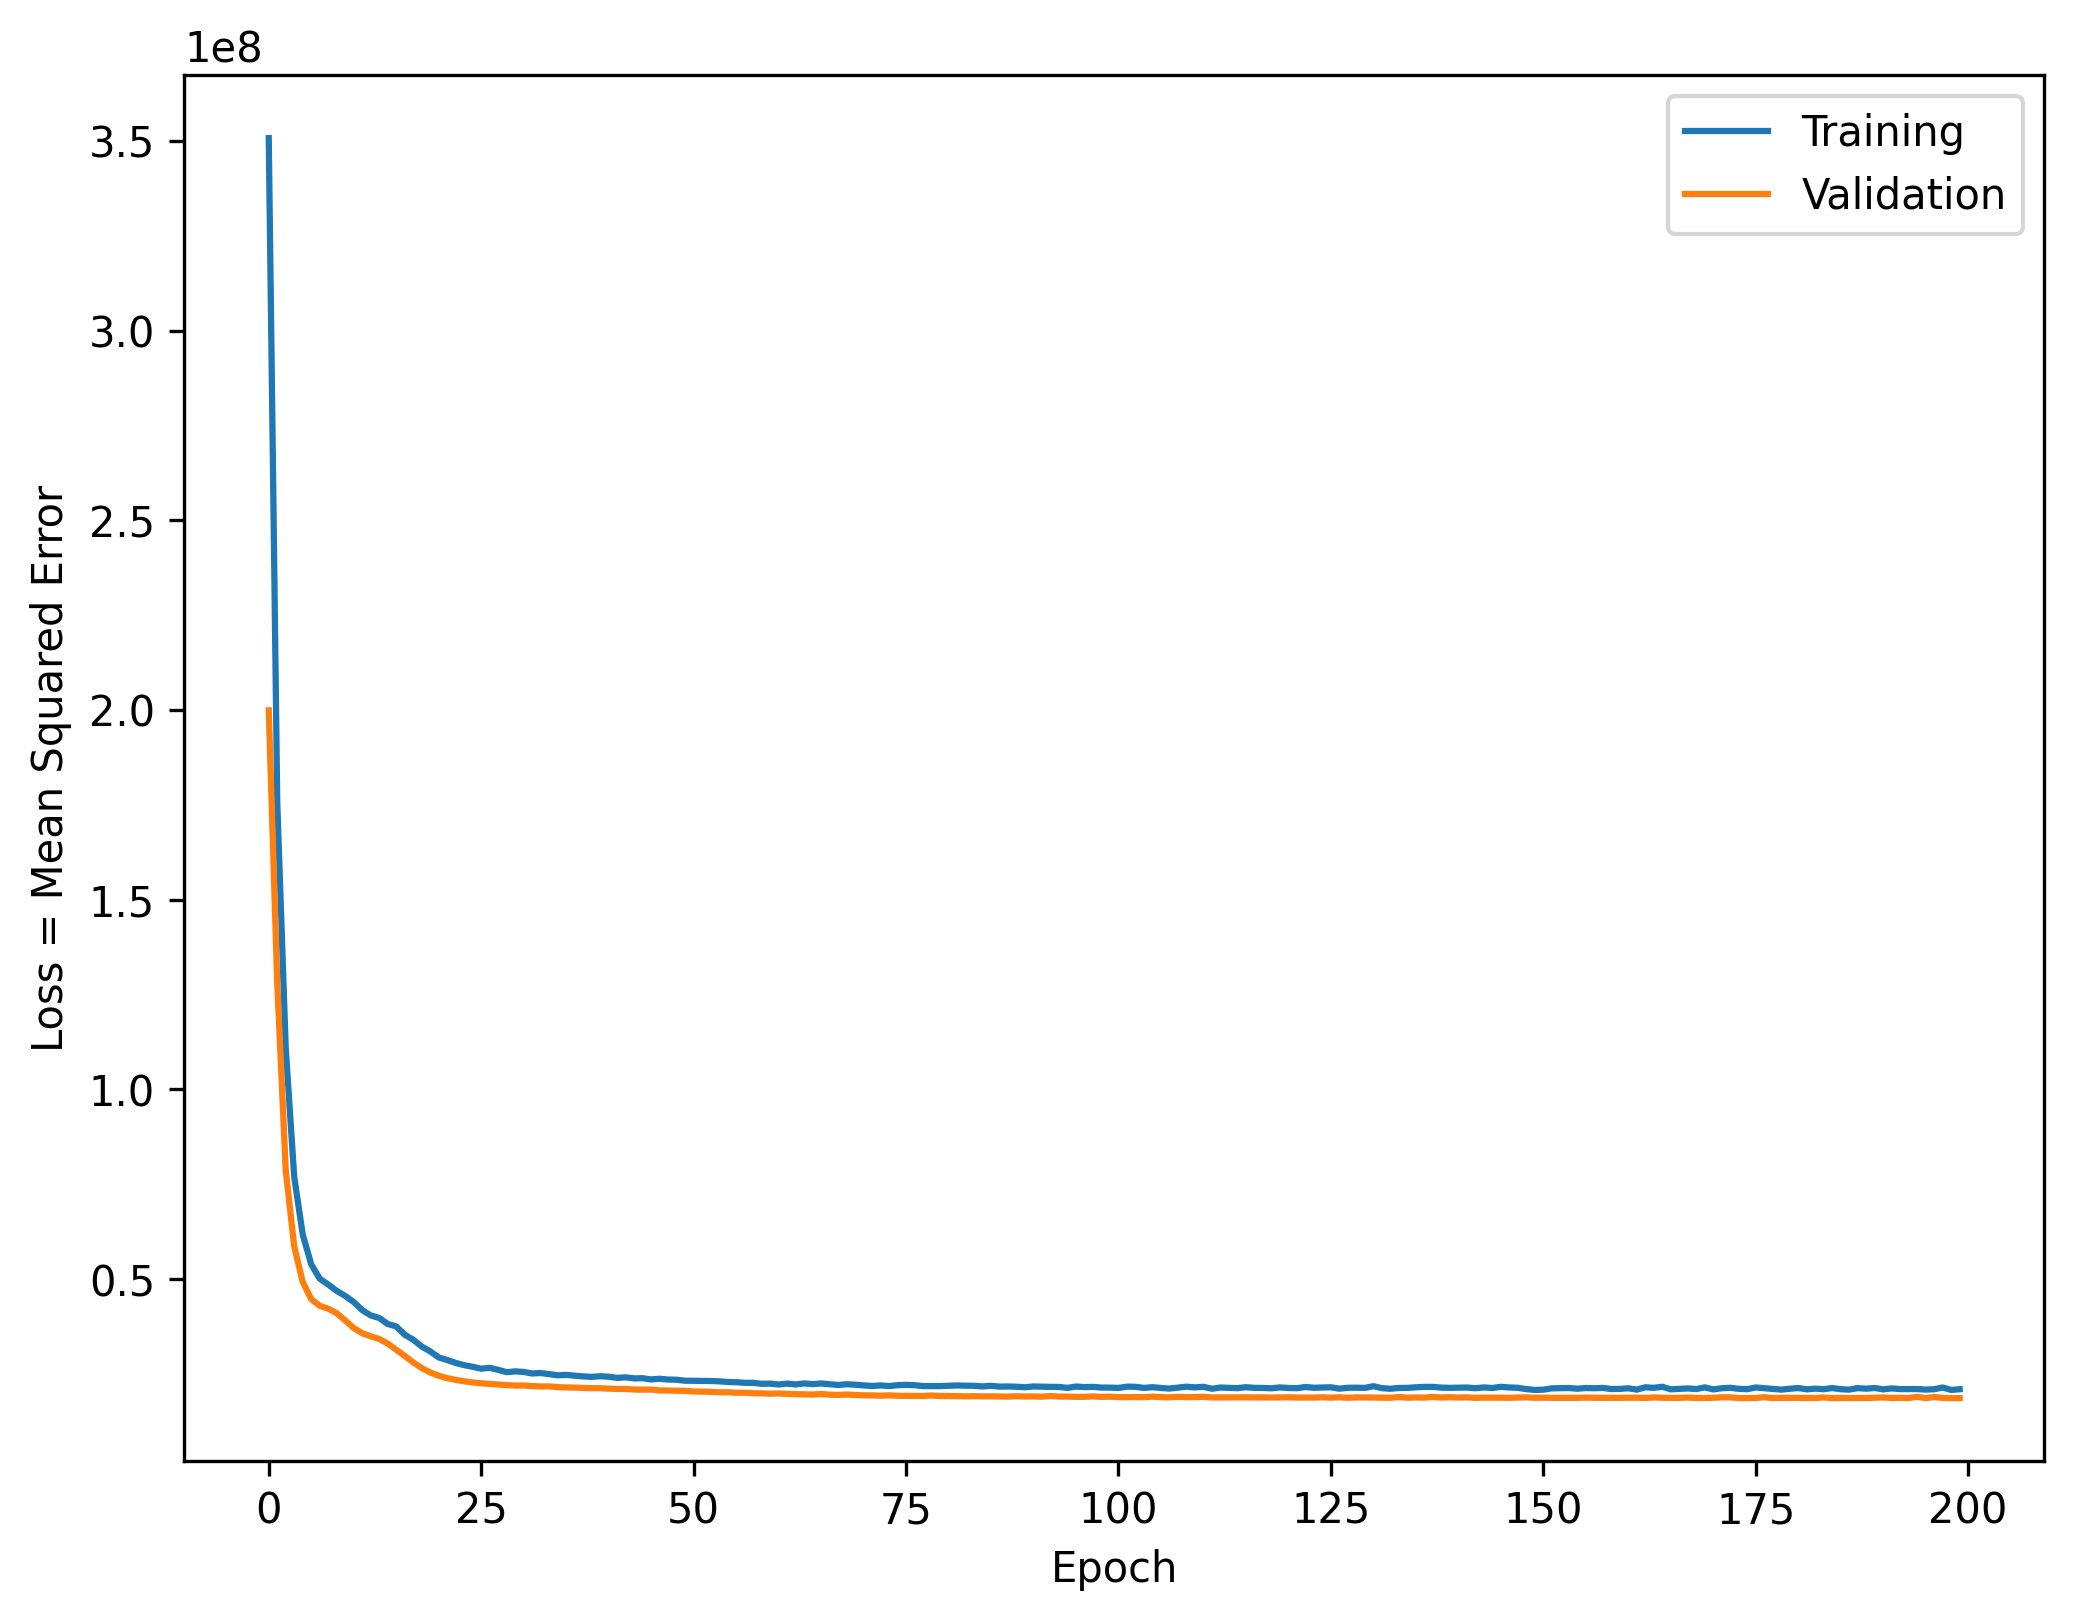

In [14]:

# the history of the fitting.
history_df = pd.DataFrame(history.history)
#use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 300)

# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()
# Label both axes
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.savefig('ANNplot.png', dpi=300)

# Show the plot.
plt.show()

### CNN Model 2

### Tuning 1: Reducing the learning rate

In [15]:
model = Sequential()

# Create an instance of the Adam class.set the learning_rate to 0.001 here.
adam_optimizer = Adam(learning_rate = 0.01)

# add the first hidden layer of the network, which will be a Dense (i.e. fully connected) layer with 64 neurons (i.e. units) 

model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
#apply a 20% dropout rate to this hidden layer, to help prevent overfitting

model.add(Dropout(0.2))
#second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

#create the output layer. This will have 1 unit because we are predicting

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# compile the model,
# using the Adam optimizer with its default parameter
# choices. We also specify the loss function and
# the metrics.
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

In [17]:
# Import the EarlyStopping class from Keras

# Define the early stopping criterion'monitor the validation Loss, a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model. 
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Epoch 1/200
1125/1125 [==============================] - 2s 1ms/step - loss: 340877088.0000 - mean_squared_error: 340877088.0000 - val_loss: 195603248.0000 - val_mean_squared_error: 195603248.0000
Epoch 2/200
1125/1125 [==============================] - 1s 1ms/step - loss: 175955296.0000 - mean_squared_error: 175955296.0000 - val_loss: 132653232.0000 - val_mean_squared_error: 132653232.0000
Epoch 3/200
1125/1125 [==============================] - 1s 1ms/step - loss: 115210096.0000 - mean_squared_error: 115210096.0000 - val_loss: 82304976.0000 - val_mean_squared_error: 82304976.0000
Epoch 4/200
1125/1125 [==============================] - 1s 1ms/step - loss: 75023536.0000 - mean_squared_error: 75023536.0000 - val_loss: 56285548.0000 - val_mean_squared_error: 56285548.0000
Epoch 5/200
1125/1125 [==============================] - 1s 1ms/step - loss: 56160020.0000 - mean_squared_error: 56160020.0000 - val_loss: 44604960.0000 - val_mean_squared_error: 44604960.0000
Epoch 6/200
1125/1125 [==

313/313 [==============================] - 0s 896us/step


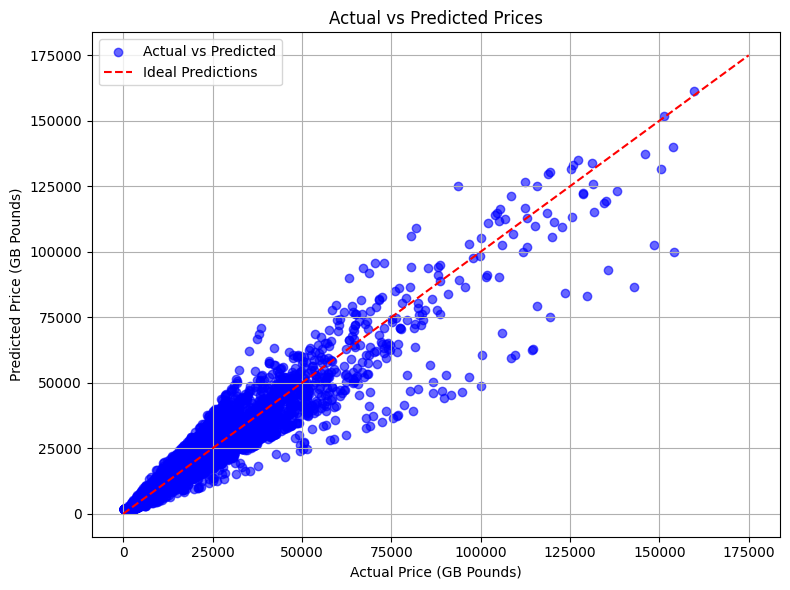

In [18]:
y_pred = model.predict(x_test_scaled)

# Plot the predicted vs actual price.
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')  # Adjust marker color and transparency

# Add a straight diagonal line with a dashed red line style.
plt.plot([0, 175000], [0, 175000], 'r--', label='Ideal Predictions')

# Label both axes.
plt.xlabel("Actual Price (GB Pounds)")
plt.ylabel("Predicted Price (GB Pounds)")

# Add a title
plt.title("Actual vs Predicted Prices")

# Add gridlines
plt.grid(True)

# Add a legend
plt.legend()

# Save the plot as an image file with a resolution of 300 dpi.
plt.savefig('ANNModel2.png', dpi=300)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [19]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

313/313 [==============================] - 0s 915us/step
Mean Squared Error (MSE): 21570488.4781
Mean Absolute Error (MAE): 2249.8448
Root Mean Squared Error (RMSE): 4413.8719
R-squared (R2): 0.9205


### Decreasing the learning rate

In [20]:
#creating an instance of the Sequential class.

model = Sequential()

# Create an instance of the Adam class.set the learning_rate to 0.001 here.
adam_optimizer = Adam(learning_rate = 0.0001)

# add the first hidden layer of the network, which will be a Dense (i.e. fully connected) layer with 64 neurons (i.e. units) 

model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
#apply a 20% dropout rate to this hidden layer, to help prevent overfitting

model.add(Dropout(0.2))
#second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

#create the output layer. This will have 1 unit because we are predicting

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# compile the model,
# using the Adam optimizer with its default parameter
# choices. We also specify the loss function and
# the metrics.
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

# Import the EarlyStopping class from Keras

# Define the early stopping criterion'monitor the validation Loss, a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model. 
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Epoch 1/200
1125/1125 [==============================] - 2s 1ms/step - loss: 352793248.0000 - mean_squared_error: 352793248.0000 - val_loss: 201347184.0000 - val_mean_squared_error: 201347184.0000
Epoch 2/200
1125/1125 [==============================] - 1s 1ms/step - loss: 179222016.0000 - mean_squared_error: 179222016.0000 - val_loss: 134174816.0000 - val_mean_squared_error: 134174816.0000
Epoch 3/200
1125/1125 [==============================] - 1s 1ms/step - loss: 116264152.0000 - mean_squared_error: 116264152.0000 - val_loss: 82885392.0000 - val_mean_squared_error: 82885392.0000
Epoch 4/200
1125/1125 [==============================] - 1s 1ms/step - loss: 78497960.0000 - mean_squared_error: 78497960.0000 - val_loss: 59225952.0000 - val_mean_squared_error: 59225952.0000
Epoch 5/200
1125/1125 [==============================] - 1s 1ms/step - loss: 60823480.0000 - mean_squared_error: 60823480.0000 - val_loss: 48645752.0000 - val_mean_squared_error: 48645752.0000
Epoch 6/200
1125/1125 [==

313/313 [==============================] - 0s 836us/step


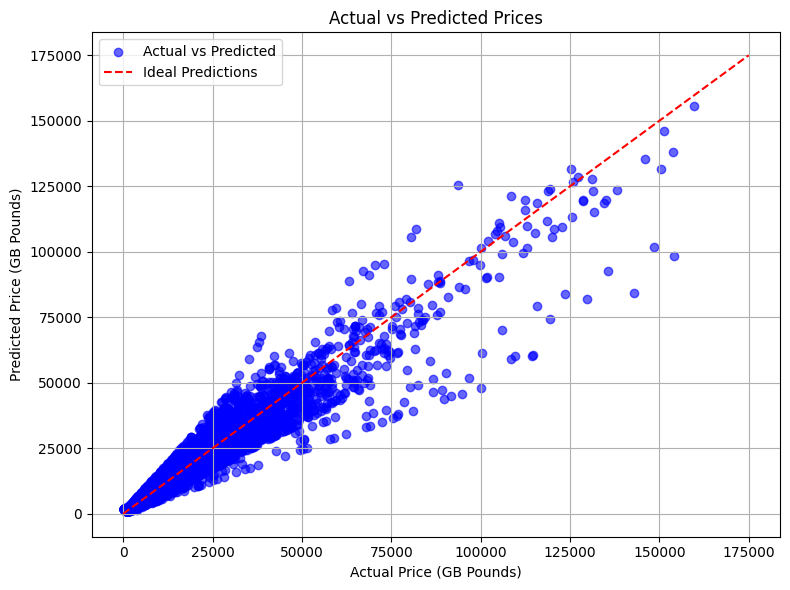

In [22]:
y_pred = model.predict(x_test_scaled)

# Plot the predicted vs actual price.
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')  # Adjust marker color and transparency

# Add a straight diagonal line with a dashed red line style.
plt.plot([0, 175000], [0, 175000], 'r--', label='Ideal Predictions')

# Label both axes.
plt.xlabel("Actual Price (GB Pounds)")
plt.ylabel("Predicted Price (GB Pounds)")

# Add a title
plt.title("Actual vs Predicted Prices")

# Add gridlines
plt.grid(True)

# Add a legend
plt.legend()

# Save the plot as an image file with a resolution of 300 dpi.
plt.savefig('ANNModel01.png', dpi=300)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [23]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

313/313 [==============================] - 0s 883us/step
Mean Squared Error (MSE): 20085705.7515
Mean Absolute Error (MAE): 2249.8448
Root Mean Squared Error (RMSE): 4413.8719
R-squared (R2): 0.9260


### Hyperparameter tuning -adding another layer

In [24]:
#creating an instance of the Sequential class.

model = Sequential()

# Create an instance of the Adam class.set the learning_rate to 0.001 here.
adam_optimizer = Adam(learning_rate = 0.0001)

# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                256       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# compile the model,
# using the Adam optimizer with its default parameter
# choices. We also specify the loss function and
# the metrics.
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

# Import the EarlyStopping class from Keras

# Define the early stopping criterion'monitor the validation Loss, a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model. 
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Epoch 1/200
1125/1125 [==============================] - 2s 1ms/step - loss: 206074336.0000 - mean_squared_error: 206074336.0000 - val_loss: 61602564.0000 - val_mean_squared_error: 61602564.0000
Epoch 2/200
1125/1125 [==============================] - 2s 1ms/step - loss: 47397352.0000 - mean_squared_error: 47397352.0000 - val_loss: 30956604.0000 - val_mean_squared_error: 30956604.0000
Epoch 3/200
1125/1125 [==============================] - 1s 1ms/step - loss: 32461616.0000 - mean_squared_error: 32461616.0000 - val_loss: 24944052.0000 - val_mean_squared_error: 24944052.0000
Epoch 4/200
1125/1125 [==============================] - 1s 1ms/step - loss: 28103046.0000 - mean_squared_error: 28103046.0000 - val_loss: 22993260.0000 - val_mean_squared_error: 22993260.0000
Epoch 5/200
1125/1125 [==============================] - 1s 1ms/step - loss: 26638562.0000 - mean_squared_error: 26638562.0000 - val_loss: 22130784.0000 - val_mean_squared_error: 22130784.0000
Epoch 6/200
1125/1125 [==========

313/313 [==============================] - 0s 854us/step


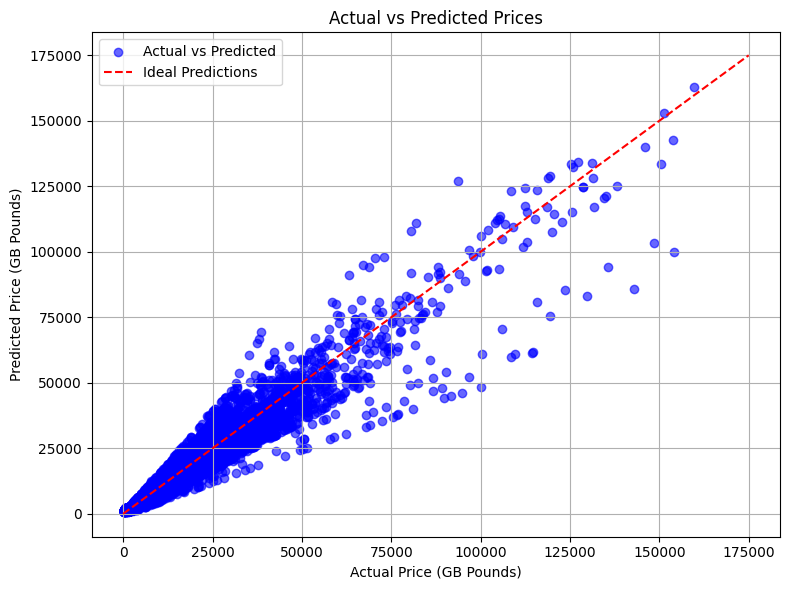

In [26]:
y_pred = model.predict(x_test_scaled)

# Plot the predicted vs actual price.
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')  # Adjust marker color and transparency

# Add a straight diagonal line with a dashed red line style.
plt.plot([0, 175000], [0, 175000], 'r--', label='Ideal Predictions')

# Label both axes.
plt.xlabel("Actual Price (GB Pounds)")
plt.ylabel("Predicted Price (GB Pounds)")

# Add a title
plt.title("Actual vs Predicted Prices")

# Add gridlines
plt.grid(True)

# Add a legend
plt.legend()

# Save the plot as an image file with a resolution of 300 dpi.
plt.savefig('ANNModel05.png', dpi=300)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [27]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

313/313 [==============================] - 0s 829us/step
Mean Squared Error (MSE): 19963293.2601
Mean Absolute Error (MAE): 2249.8448
Root Mean Squared Error (RMSE): 4413.8719
R-squared (R2): 0.9264


### Checking the drop out rate imposed in the first hidden layer;repeating the neural network model with a drop out rate of 10%

In [28]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.

# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()
# Compile the model with the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
# Define an early stopping criterion with a patience
# of 20.

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                256       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/1125 [==============================] - 2s 1ms/step - loss: 339306720.0000 - mean_squared_error: 339306720.0000 - val_loss: 194985488.0

313/313 [==============================] - 0s 1ms/step


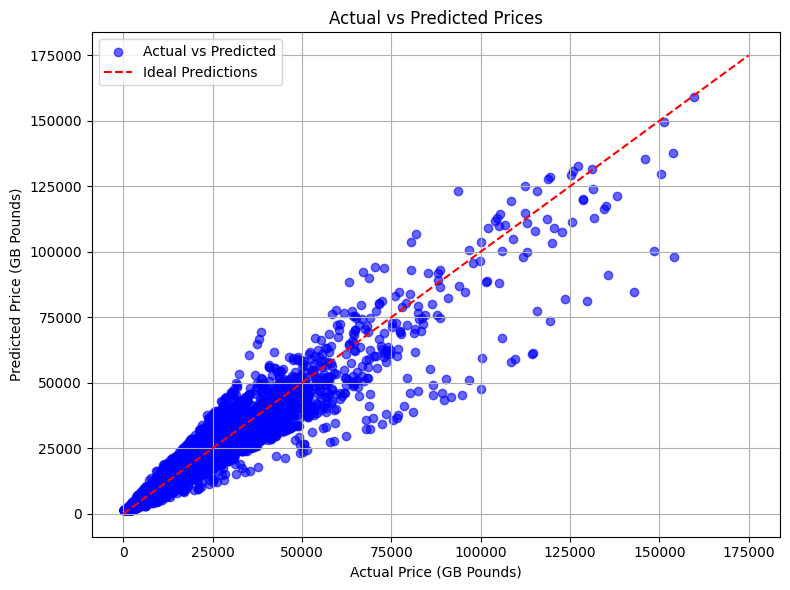

In [29]:
y_pred = model.predict(x_test_scaled)

# Plot the predicted vs actual price.
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')  # Adjust marker color and transparency

# Add a straight diagonal line with a dashed red line style.
plt.plot([0, 175000], [0, 175000], 'r--', label='Ideal Predictions')

# Label both axes.
plt.xlabel("Actual Price (GB Pounds)")
plt.ylabel("Predicted Price (GB Pounds)")

# Add a title
plt.title("Actual vs Predicted Prices")

# Add gridlines
plt.grid(True)

# Add a legend
plt.legend()

# Save the plot as an image file with a resolution of 300 dpi.
plt.savefig('ANNModel06.png', dpi=300)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

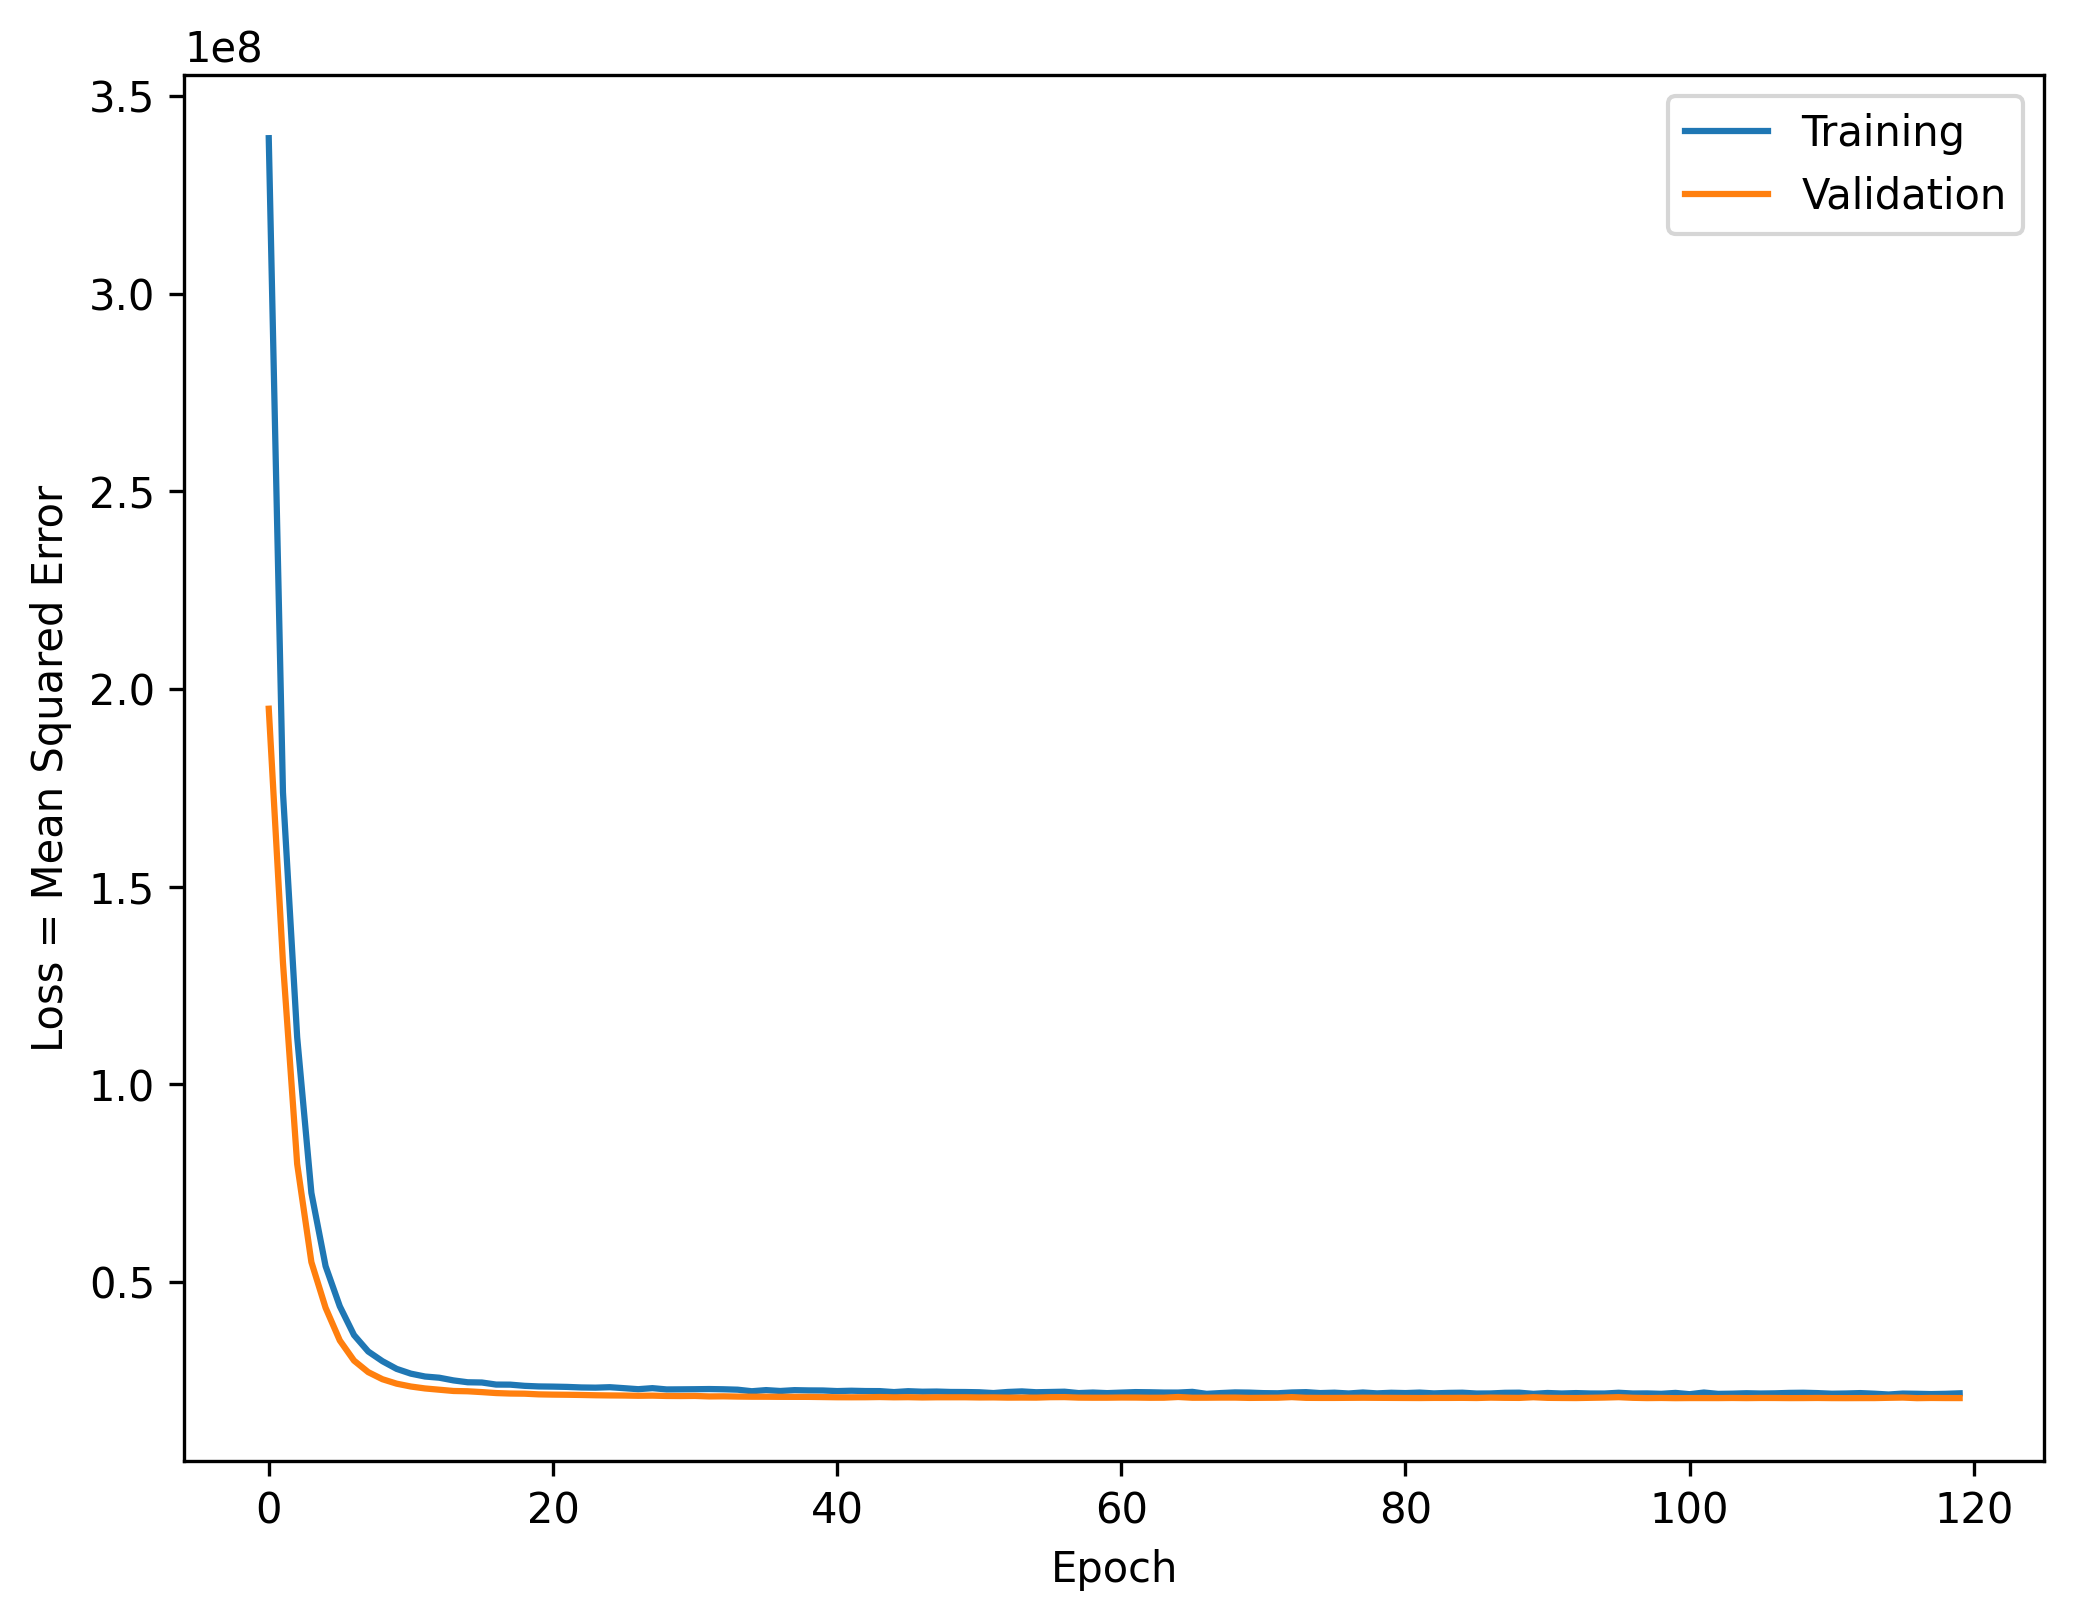

In [30]:

# the history of the fitting.
history_df = pd.DataFrame(history.history)
#use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 300)

# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()
# Label both axes
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.savefig('ANNplot106.png', dpi=300)

# Show the plot.
plt.show()

In [31]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

313/313 [==============================] - 0s 781us/step
Mean Squared Error (MSE): 21690450.4119
Mean Absolute Error (MAE): 2249.8448
Root Mean Squared Error (RMSE): 4413.8719
R-squared (R2): 0.9201


### Adding Categorical Variables to the prediction

In [32]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                256       
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:

# Preprocess categorical variables
label_encoders = {}
for cat_col in ['Manufacturer', 'Fuel type', 'Model']:
    le = LabelEncoder()
    df[cat_col] = le.fit_transform(df[cat_col])
    label_encoders[cat_col] = le

# Split the data into features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['Mileage', 'Year of manufacture', 'Engine size']] = scaler.fit_transform(X_train[['Mileage', 'Year of manufacture', 'Engine size']])
X_val[['Mileage', 'Year of manufacture', 'Engine size']] = scaler.transform(X_val[['Mileage', 'Year of manufacture', 'Engine size']])



In [36]:
# Compile the model with the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regression task, so using linear activation

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
1250/1250 [==============================] - 2s 1ms/step - loss: 130606696.0000 - mae: 6088.3066 - val_loss: 33935528.0000 - val_mae: 3081.5859
Epoch 2/200
1250/1250 [==============================] - 2s 1ms/step - loss: 28538280.0000 - mae: 2928.3672 - val_loss: 28103102.0000 - val_mae: 2802.1370
Epoch 3/200
1250/1250 [==============================] - 2s 1ms/step - loss: 25005032.0000 - mae: 2743.3853 - val_loss: 25137994.0000 - val_mae: 2662.9473
Epoch 4/200
1250/1250 [==============================] - 2s 1ms/step - loss: 23200106.0000 - mae: 2622.5227 - val_loss: 23247294.0000 - val_mae: 2620.5579
Epoch 5/200
1250/1250 [==============================] - 2s 1ms/step - loss: 21764842.0000 - mae: 2511.5000 - val_loss: 22707522.0000 - val_mae: 2469.1931
Epoch 6/200
1250/1250 [==============================] - 2s 1ms/step - loss: 20485828.0000 - mae: 2418.3059 - val_loss: 20364880.0000 - val_mae: 2353.7502
Epoch 7/200
1250/1250 [==============================] - 2s 1ms/step 

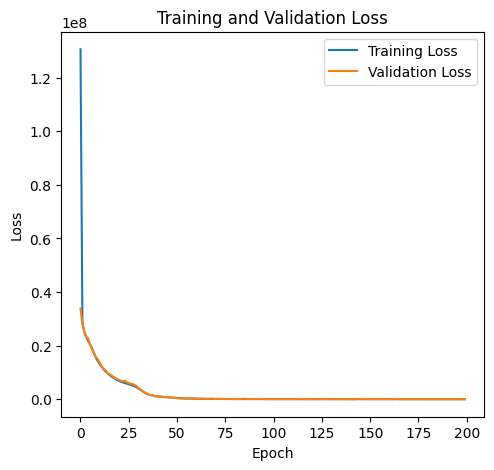

In [37]:
# Plot training and validation losses versus epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


313/313 [==============================] - 0s 1ms/step


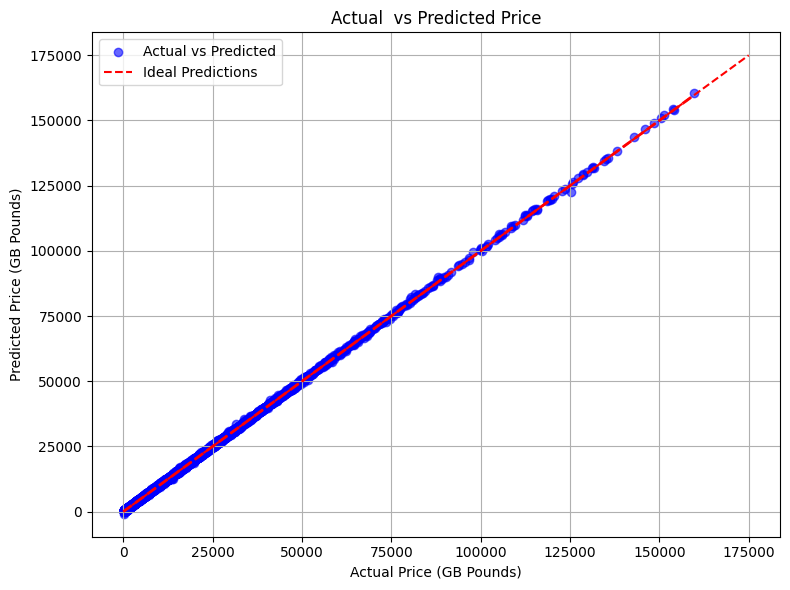

In [38]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)

# Plot actual price versus predicted price
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred,color='blue', alpha=0.6, label='Actual vs Predicted')
# Add a straight diagonal line with a dashed red line style.
plt.plot([0, 175000], [0, 175000], 'r--', label='Ideal Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
plt.title('Actual  vs Predicted Price')
plt.xlabel('Actual Price (GB Pounds)')
plt.ylabel('Predicted Price (GB Pounds)')
#plt.show()


# Plot the predicted vs actual price.
#plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')  # Adjust marker color and transparency

#- Add a straight diagonal line with a dashed red line style.
#- plt.plot([0, 175000], [0, 175000], 'r--', label='Ideal Predictions')

# Label both axes.
#-plt.xlabel("Actual Price (GB Pounds)")
#-plt.ylabel("Predicted Price (GB Pounds)")

# Add a title
#-plt.title("Actual vs Predicted Prices")

# Add gridlines
plt.grid(True)

# Add a legend
plt.legend()

# Save the plot as an image file with a resolution of 300 dpi.
plt.savefig('ANNModel08.png', dpi=300)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [39]:

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_val, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

313/313 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 137.5873
Mean Squared Error (MSE): 42890.4811
Root Mean Squared Error (RMSE): 207.1002
R-squared (R2): 0.9998


In [40]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                256       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
